# Visualization of image processing

When processing images, one should use the fact that final and intermediate results have simple graphical representations, as images, regions or points of interest. This makes interactive image processing easier to verify and faster to improve. 

Here we show a few examples of how to visualize the results of image processing, using the ``matplotlib`` library.

![camera figure](camera_figure.png)

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Displaying images

In [3]:
from skimage import data
cat = data.chelsea()

<IPython.core.display.Javascript object>


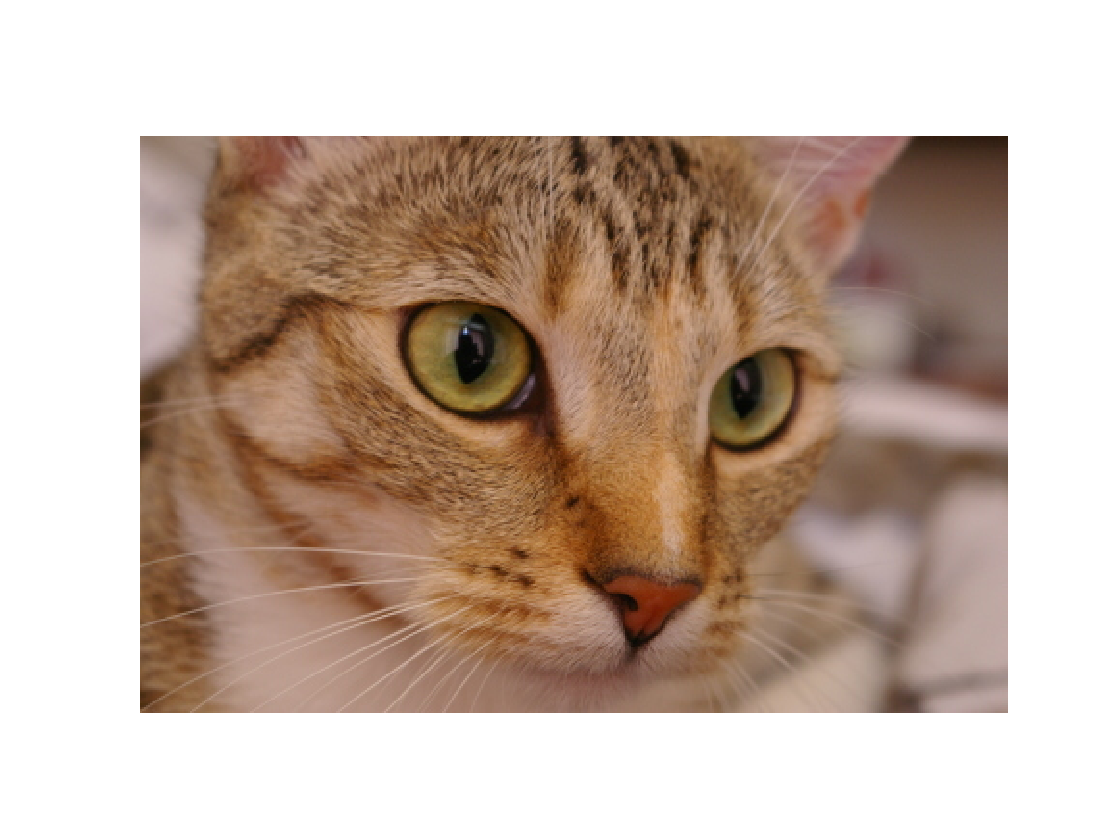

(-0.5, 450.5, 299.5, -0.5)

In [4]:
plt.imshow(cat)
# remove ticks and labels
plt.axis('off')

In [5]:
camera = data.camera()

<IPython.core.display.Javascript object>


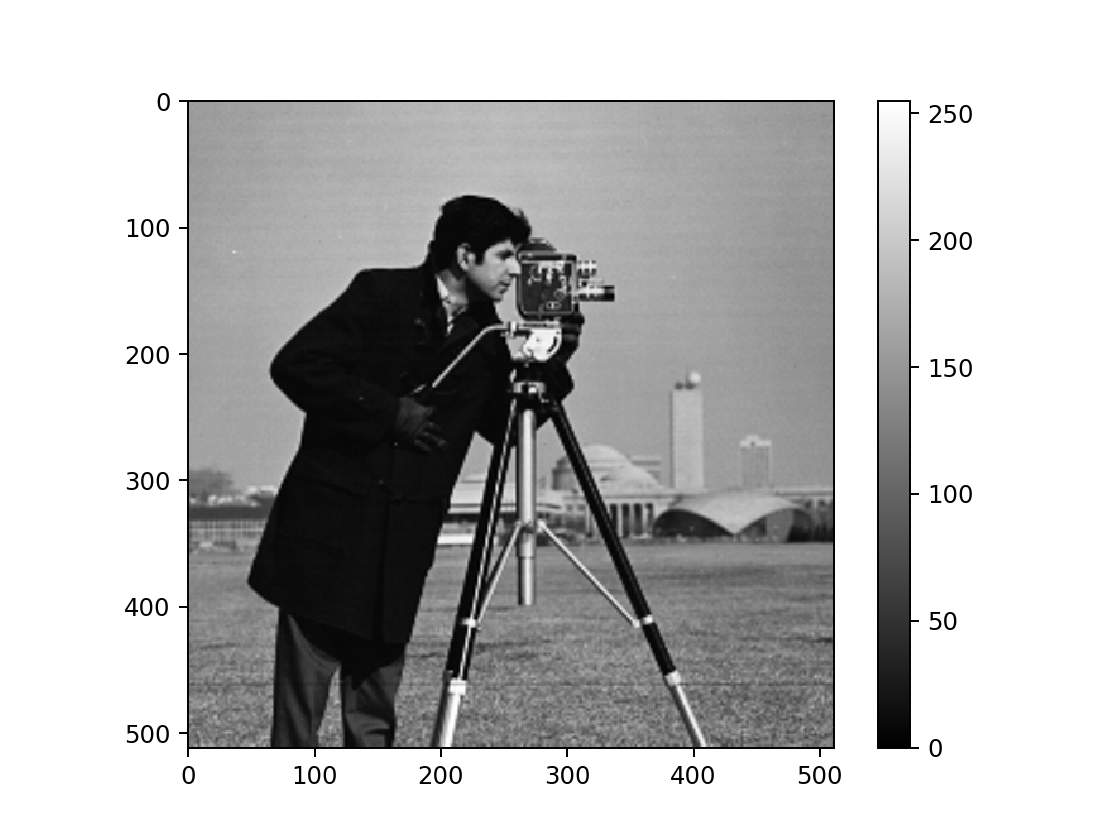

In [6]:
plt.figure()
plt.imshow(camera)
plt.colorbar()

In [7]:
plt.gray()

### Interpolation

<IPython.core.display.Javascript object>


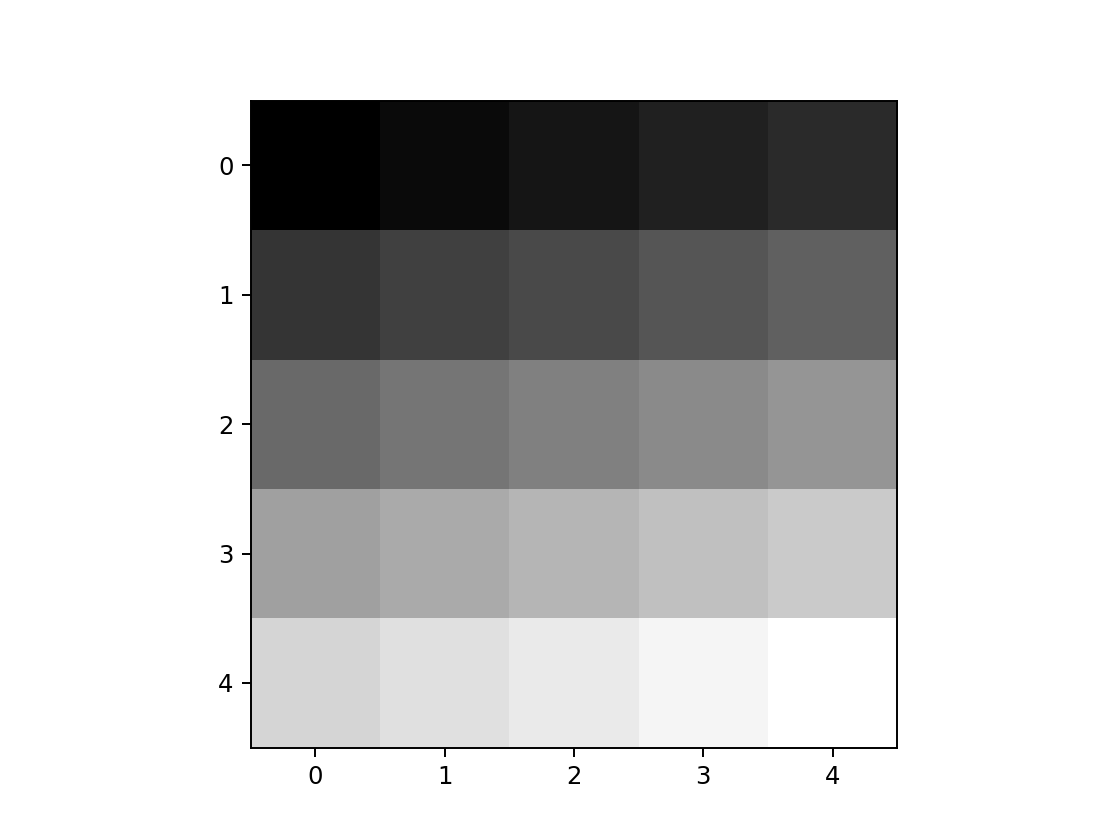

In [8]:
a = 1./25 * np.arange(25).reshape((5, 5))  
plt.figure()
plt.imshow(a)

<IPython.core.display.Javascript object>


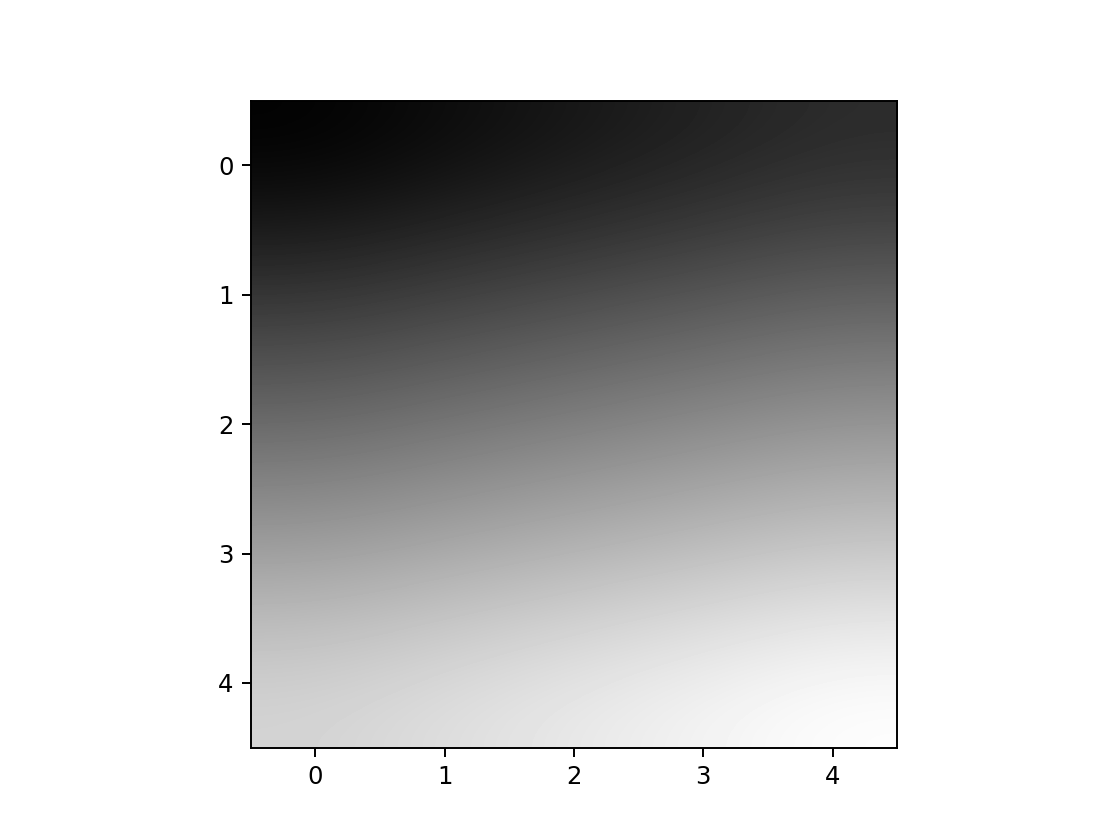

In [9]:
plt.figure()
plt.imshow(a, interpolation='bicubic')

### Contours

<IPython.core.display.Javascript object>


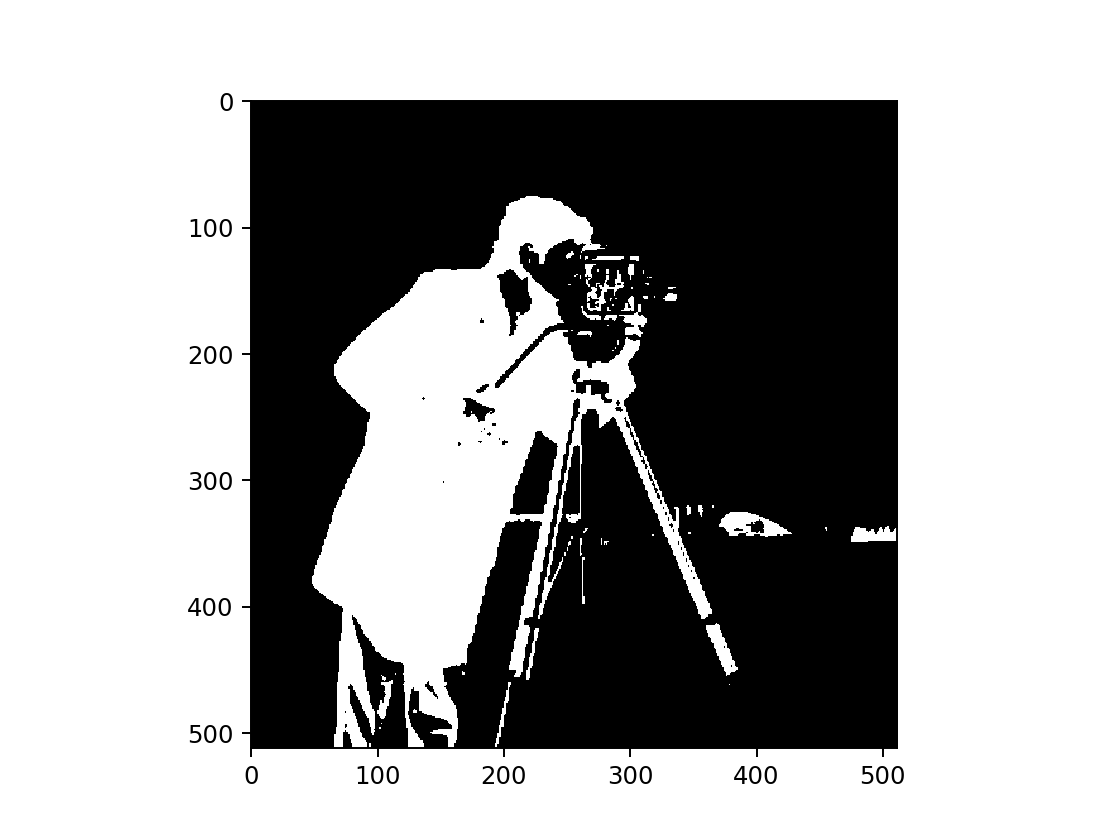

In [10]:
plt.figure()
plt.imshow(camera < 40)

<IPython.core.display.Javascript object>


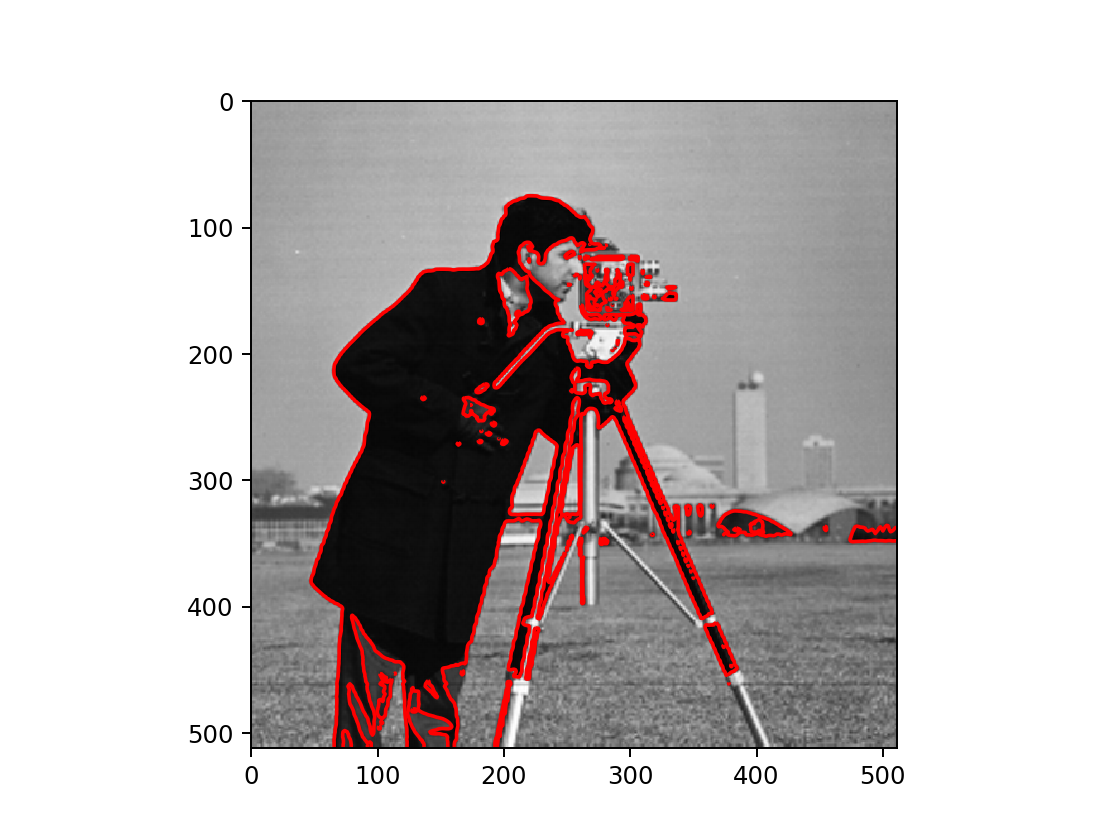

In [11]:
plt.figure()
plt.imshow(camera)
plt.contour(camera, [40], colors='r')

Saving figures using ``plt.savefig``. (To save an image array to a file, you can use ``skimage.io.imsave``).

In [12]:
import tempfile, os
tmp_dir = tempfile.mkdtemp()
file_name_png = os.path.join(tmp_dir, 'figure.png')
plt.savefig(file_name_png)
file_name_pdf = os.path.join(tmp_dir, 'figure.pdf')
plt.savefig(file_name_pdf)
os.listdir(tmp_dir)

['figure.pdf', 'figure.png']

### Marking pixels/points/coordinates of interest

In [13]:
from skimage import feature

In [14]:
coords = feature.corner_peaks(feature.corner_harris(camera), min_distance=3)
print(coords.shape)

(101, 2)


<IPython.core.display.Javascript object>


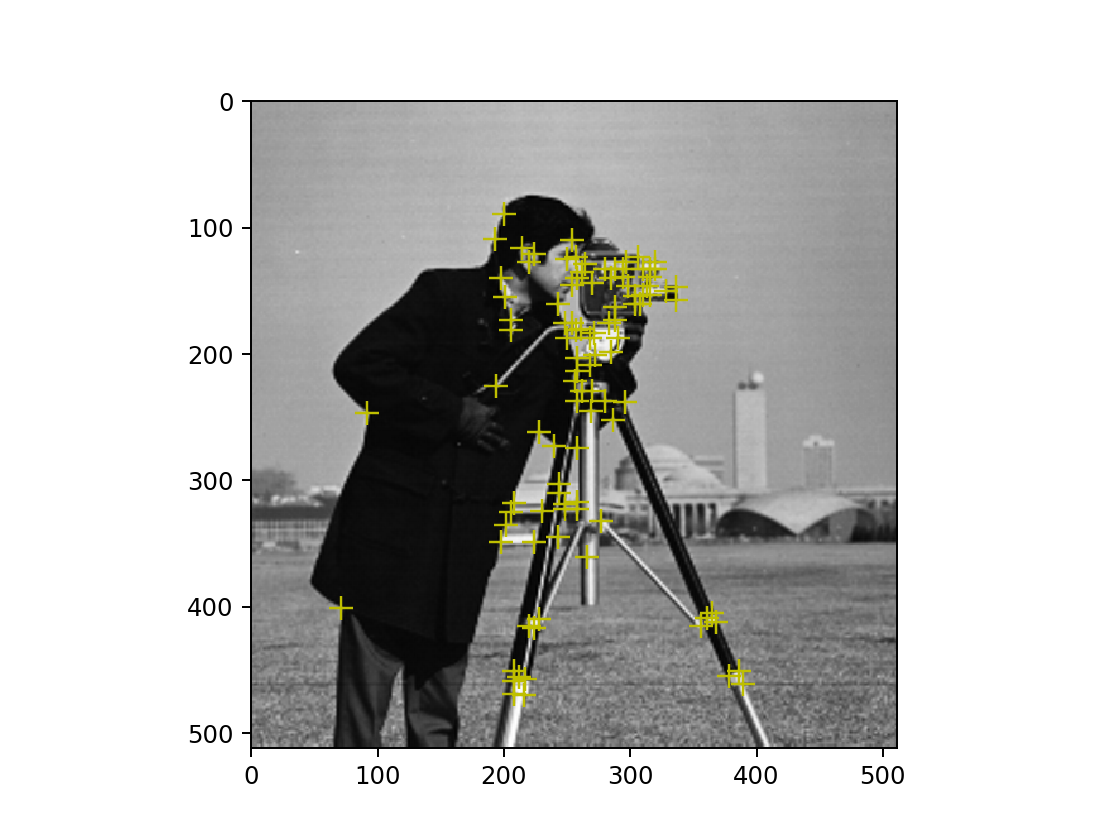

In [15]:
plt.figure()
plt.imshow(camera)
plt.plot(coords[:, 1], coords[:, 0], '+y', ms=10)

<div class="alert alert-success">
    <b>EXERCISE</b>: draw the contours of the darkest regions of the cat image (``data.chelsea()``).

</div>

For this, convert first the image to the Lab colorspace (using ``color.rgb2lab``). The first (L) channel in Lab colorspace corresponds to the light intensity, while the two others correspond to color information. 

Then you can plot contours of the L channel of the Lab array, superimposed on the RGB cat image. Indeed, it is possible to have on the same matplotlib plot an image array, and contours of another array, as long as the two arrays have the same numbers of rows and columns. 

Change the value of the contours to visualize darker and darker regions.

Plot a red dot at the (approximate) location of the eyes' pupils.

![cat with contours](cat_contour.png)

<IPython.core.display.Javascript object>


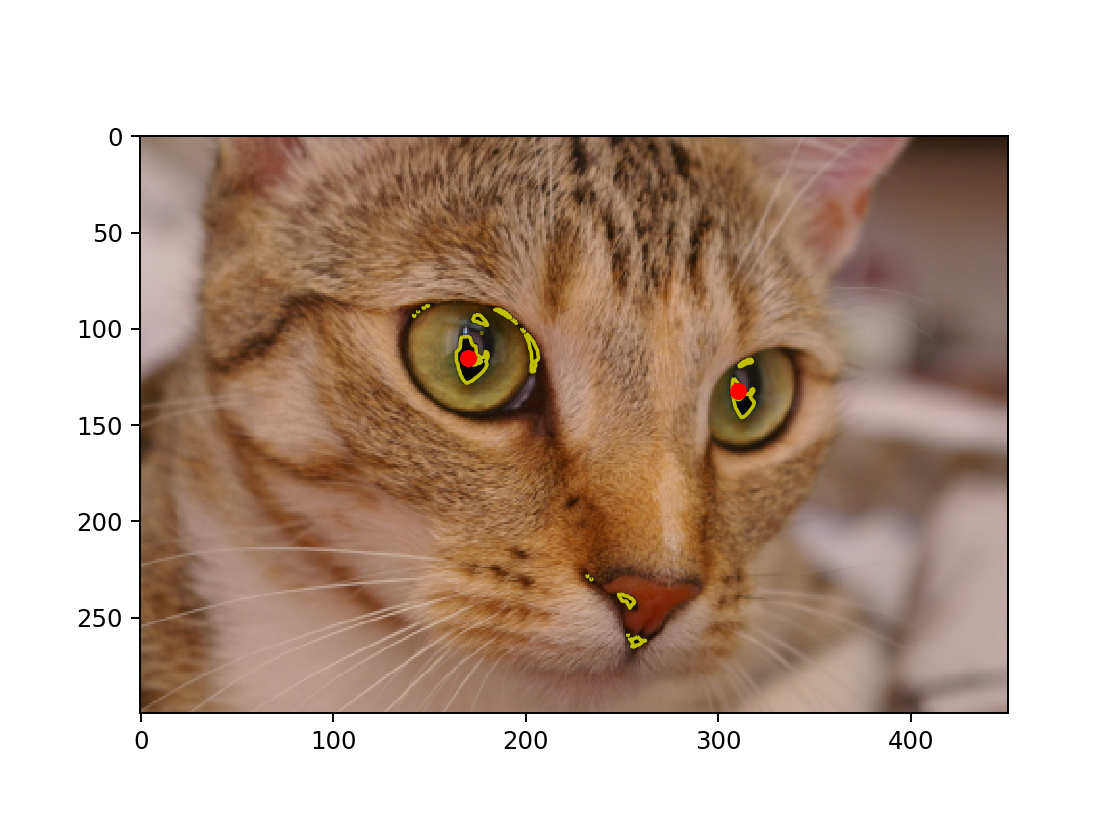

In [28]:
# Your solution goes here
cat = data.chelsea()
plt.figure()
plt.imshow(cat)
from skimage import color
cat_lab = color.rgb2lab(cat)
plt.contour(cat_lab[..., 0], [5], colors='y')
plt.plot([170], [115], 'or', ms=6)
plt.plot([310], [132], 'or', ms=6)

**If you finish the exercise early, you can read through the following bonus materials.**

### Drawing shapes

In [16]:
from skimage import draw, transform

<IPython.core.display.Javascript object>


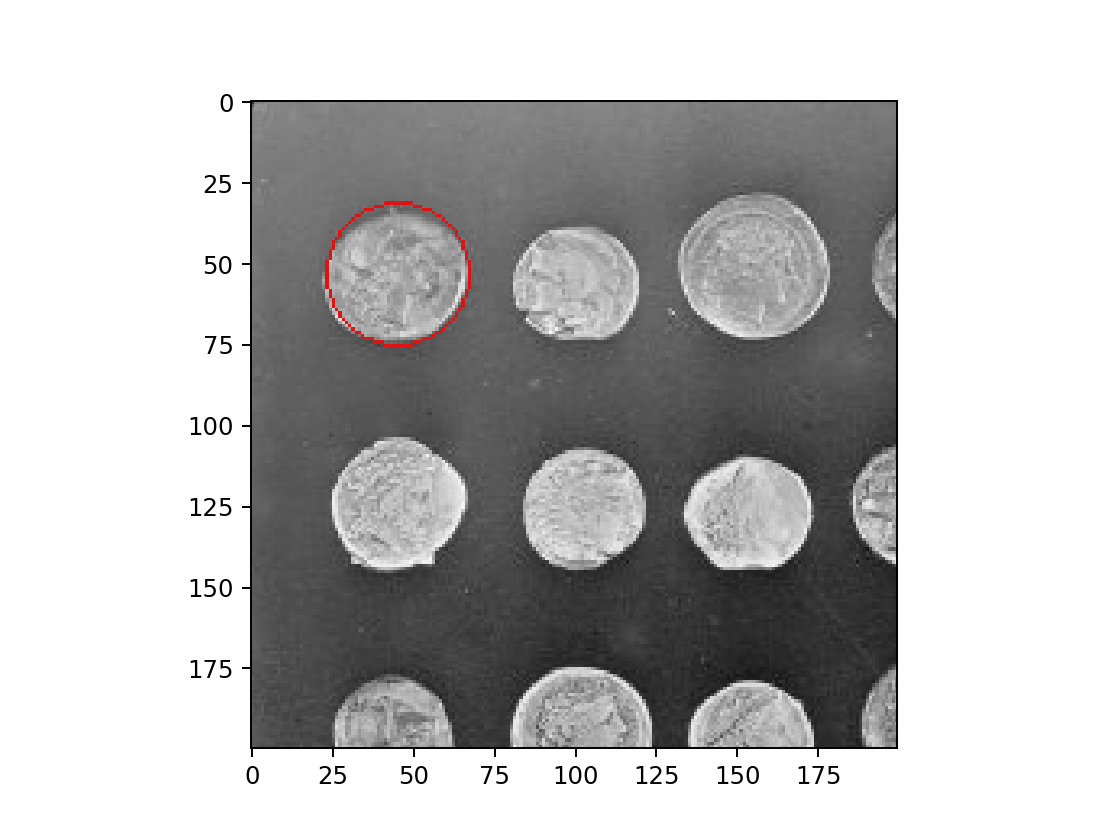

In [17]:
plt.figure()
coins = data.coins()
plt.imshow(coins)
from skimage import color
coins_color = color.gray2rgb(coins)
plt.imshow(coins_color)

In [18]:
c_rr, c_cc = draw.circle_perimeter(53, 45, 22)
coins_color[c_rr, c_cc] = (220, 20, 20)
plt.imshow(coins_color[:200, :200])

### scikit-image specific visualization functions

<IPython.core.display.Javascript object>


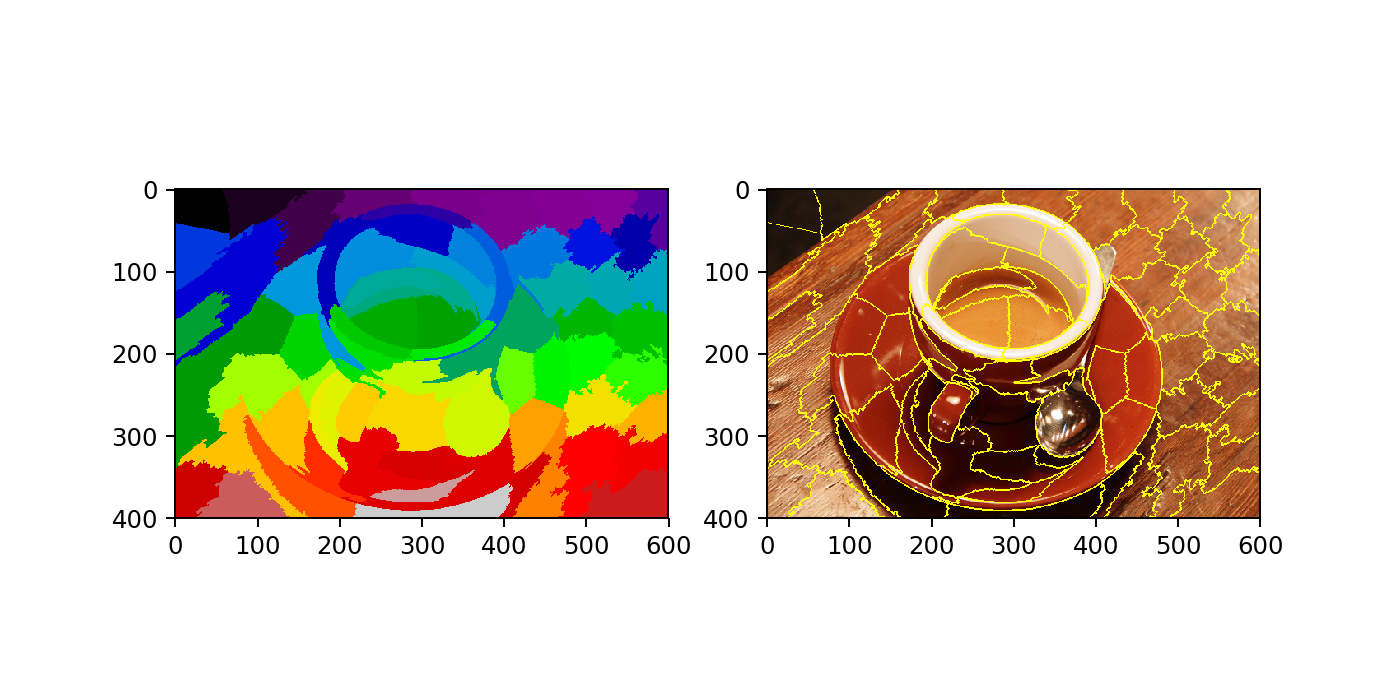

In [19]:
coffee = data.coffee()
from skimage import segmentation
superpixels = segmentation.slic(coffee)
fig, ax = plt.subplots(ncols=2, figsize=(8, 4))
ax = ax.ravel()
ax[0].imshow(superpixels, cmap='nipy_spectral')
ax[1].imshow(segmentation.mark_boundaries(coffee, superpixels))